In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [6]:
df = pd.read_csv("gold_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Handling missing values (if any)
df.isnull().sum()  # Check for missing values

# Fill missing values with forward fill
df.ffill(inplace=True)

# Feature Engineering: Create new features (e.g., month, day, and year)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


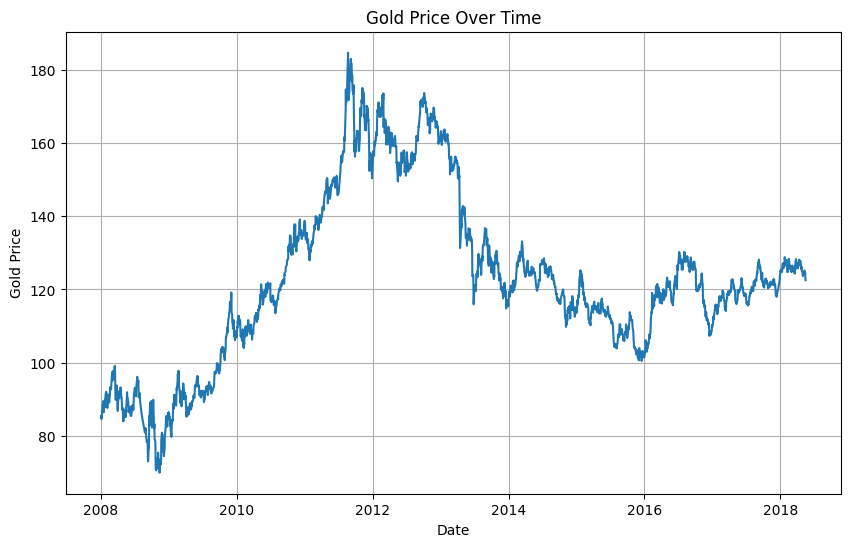

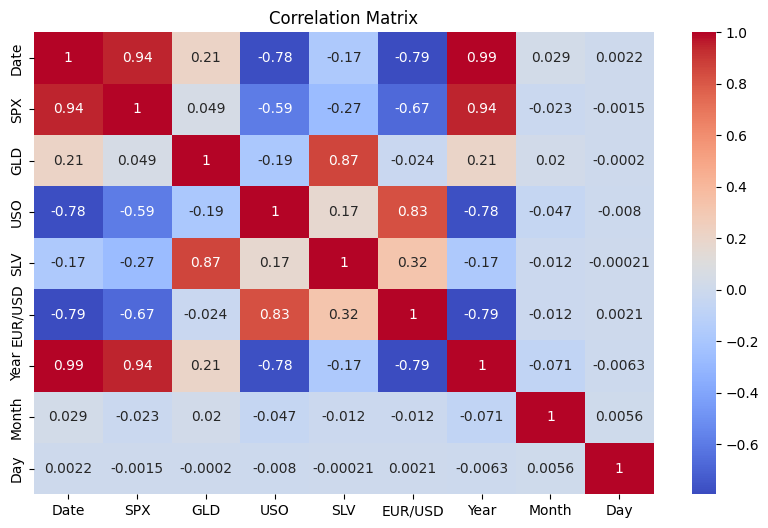

In [11]:
# Visualizing the price trends over time
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['GLD'])
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.grid(True)
plt.show()

# Correlation matrix to see relationships between features
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Selecting features and target variable
X = df[['Year', 'Month', 'Day']]  # Features (could add more features)
y = df['GLD']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling: Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


In [15]:
# Calculate Mean Squared Error and R2 Score for all models
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}")

# Evaluate Linear Regression
evaluate_model('Linear Regression', y_test, y_pred_lr)

# Evaluate Random Forest
evaluate_model('Random Forest', y_test, y_pred_rf)


Linear Regression - MSE: 523.2489, R²: 0.0457
Random Forest - MSE: 2.4334, R²: 0.9956


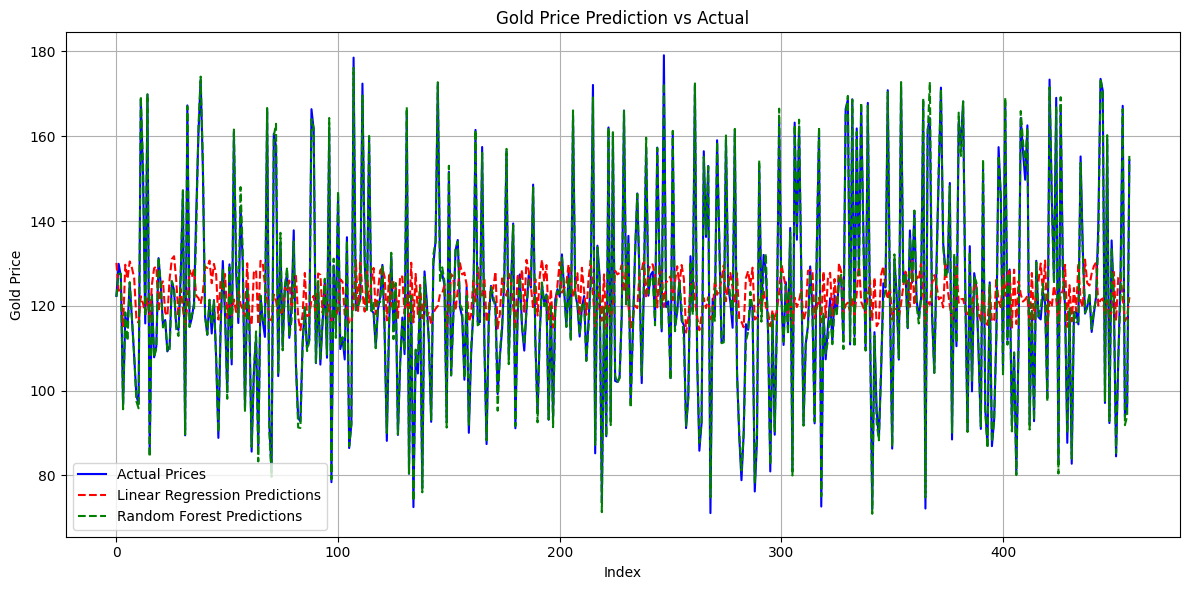

In [20]:
# Reset index to align all series properly
y_test = y_test.reset_index(drop=True)
y_pred_lr = pd.Series(y_pred_lr)
y_pred_rf = pd.Series(y_pred_rf)

# Now plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred_lr, label='Linear Regression Predictions', linestyle='--', color='red')
plt.plot(y_pred_rf, label='Random Forest Predictions', linestyle='--', color='green')
plt.title('Gold Price Prediction vs Actual')
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()